In [1]:
import sys

import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../src')

from load_data import data_loader
from analysis import calculate_variability, plot_distributions, plot_correlations, compare_trends, detect_outliers, produce_visualizations

Change the file
from load_data import txt_to_csv
txt_to_csv('../data/MachineLearningRating_v3.txt', '../data/MachineLearningRating_v3.csv')

In [2]:
file_path = '../data/MachineLearningRating_v3.csv'
df = data_loader(file_path)

c:\Users\user\Documents\Python\week-03\notebooks\../src\load_data.py:16: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,14,15,16,18,20,21,24,25,26,27,28,29,30,31,32,33,34,35,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827.0,2015-03-01 00:00:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,NaN
1,145249,12827.0,2015-05-01 00:00:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,NaN
2,145249,12827.0,2015-07-01 00:00:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN
3,145255,12827.0,2015-05-01 00:00:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0,NaN
4,145255,12827.0,2015-07-01 00:00:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0,NaN


In [5]:
df.isnull().sum()  # Get the count of missing values per column

UnderwrittenCoverID              0
PolicyID                    703321
TransactionMonth            703321
IsVATRegistered             703321
Citizenship                 703321
LegalType                   703321
Title                       703321
Language                    704756
Bank                        704189
AccountType                 703321
MaritalStatus               703321
Gender                      703321
Country                     703321
Province                    703321
PostalCode                  703321
MainCrestaZone              703321
SubCrestaZone               703321
ItemType                    703321
mmcode                      703321
VehicleType                 703321
RegistrationYear            703321
make                        703321
Model                       703321
Cylinders                   703321
cubiccapacity               703321
kilowatts                   703321
bodytype                    703321
NumberOfDoors               703357
VehicleIntroDate    

In [6]:
df.info()  # Check the data types and ensure they are as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708099 entries, 0 to 708098
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UnderwrittenCoverID       708099 non-null  object 
 1   PolicyID                  4778 non-null    float64
 2   TransactionMonth          4778 non-null    object 
 3   IsVATRegistered           4778 non-null    object 
 4   Citizenship               4778 non-null    object 
 5   LegalType                 4778 non-null    object 
 6   Title                     4778 non-null    object 
 7   Language                  3343 non-null    object 
 8   Bank                      3910 non-null    object 
 9   AccountType               4778 non-null    object 
 10  MaritalStatus             4778 non-null    object 
 11  Gender                    4778 non-null    object 
 12  Country                   4778 non-null    object 
 13  Province                  4778 non-null    f

In [9]:
df.duplicated().sum()  # Count duplicate rows

np.int64(0)

In [8]:
df.columns  # Get the column names

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [15]:
df.describe()  # Get the summary statistics

,PolicyID,Province,ItemType,VehicleType,Model,Cylinders,Converted,CrossBorder,StatutoryRiskType,TotalPremium,TotalClaims
count,4778.000000,4778.000000,4.778000e+03,4778.000000,4778.000000,4778.000000,0.0,3.600000e+01,4778.000000,4742.000000,0.0
mean,8406.834450,2583.378820,5.447435e+07,2010.484303,22.944328,2443.010883,NaN,2.572889e+05,74.478345,48.621353,NaN
std,5865.974212,1786.210659,1.528991e+07,3.199897,214.805938,620.012222,NaN,8.325747e+05,189.484374,1432.801911,NaN
min,283.000000,122.000000,4.042080e+06,2004.000000,3.000000,108.000000,NaN,1.000000e-02,0.000000,0.000000,NaN
25%,2504.000000,1619.000000,6.005692e+07,2008.000000,4.000000,2148.000000,NaN,5.000000e+03,0.000000,0.000000,NaN
50%,8113.000000,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,NaN,7.500000e+03,2.746088,0.000000,NaN
75%,12827.000000,4074.000000,6.005842e+07,2013.000000,4.000000,2694.000000,NaN,3.032000e+05,37.109162,0.000000,NaN
max,21252.000000,9725.000000,6.503072e+07,2015.000000,2488.000000,4921.000000,NaN,5.000000e+06,1486.679035,74967.017544,NaN


In [17]:
df.dtypes  # Get the data types of the columns

UnderwrittenCoverID          object
PolicyID                    float64
TransactionMonth             object
IsVATRegistered              object
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                    float64
PostalCode                   object
MainCrestaZone               object
SubCrestaZone                object
ItemType                    float64
mmcode                       object
VehicleType                 float64
RegistrationYear             object
make                         object
Model                       float64
Cylinders                   float64
cubiccapacity                object
kilowatts                    object
bodytype                     object
NumberOfDoors               

In [18]:
# Convert the 'TransactionMonth' column to Date
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

In [19]:
df['TransactionMonth'].dtype

dtype('<M8[ns]')

In [21]:
# Variability function usage
columns_of_interest = ['TotalPremium', 'TotalClaims']
# Call the function and get results
variability_results = calculate_variability(df, columns_of_interest)

# Display the results
for column, stats in variability_results.items():
  print(f"{column}:")
  for stat_name, value in stats.items():
    print(f"  {stat_name}: {value}")

TotalPremium:
  Mean: 48.621353304179905
  Variance: 2052921.316273863
  Standard Deviation: 1432.8019110379016
  Coefficient of Variation (%): 2946.8573243409205
TotalClaims:
  Mean: nan
  Variance: nan
  Standard Deviation: nan
  Coefficient of Variation (%): nan


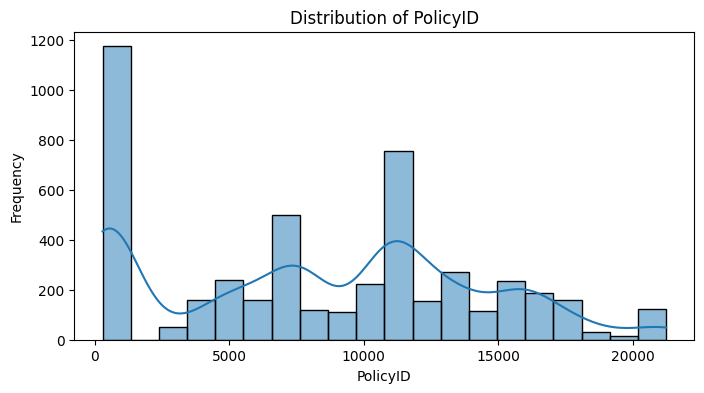

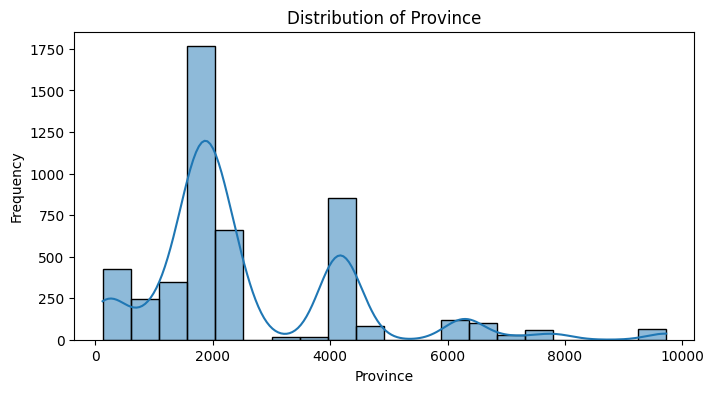

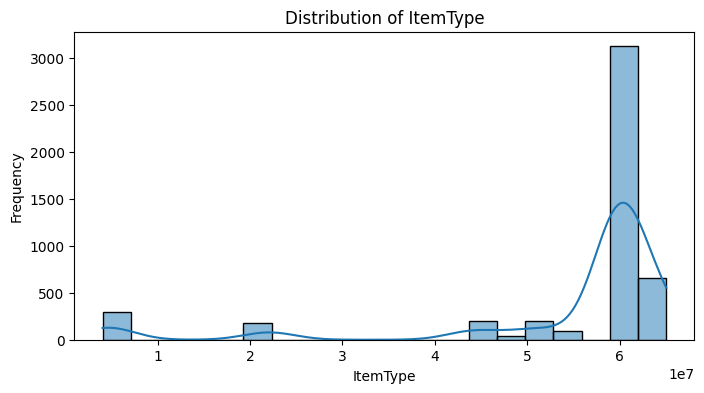

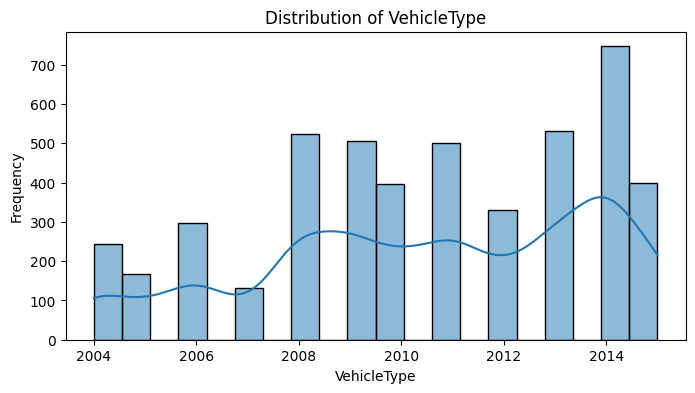

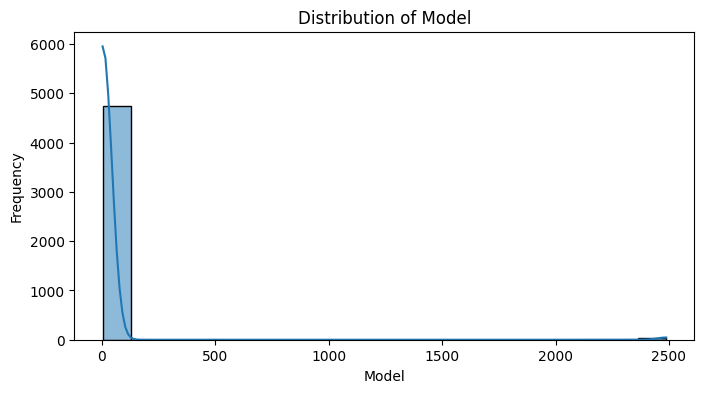

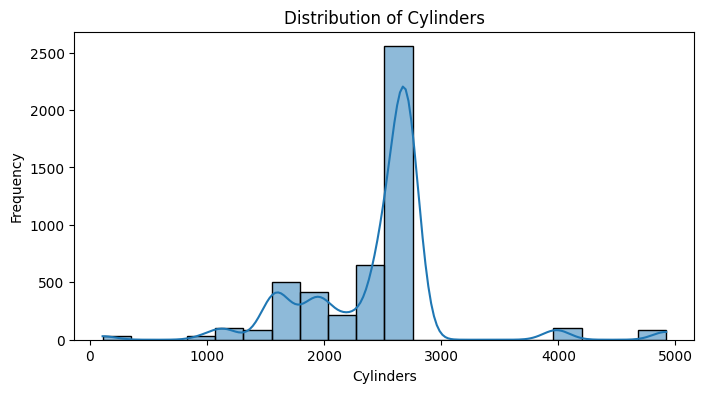

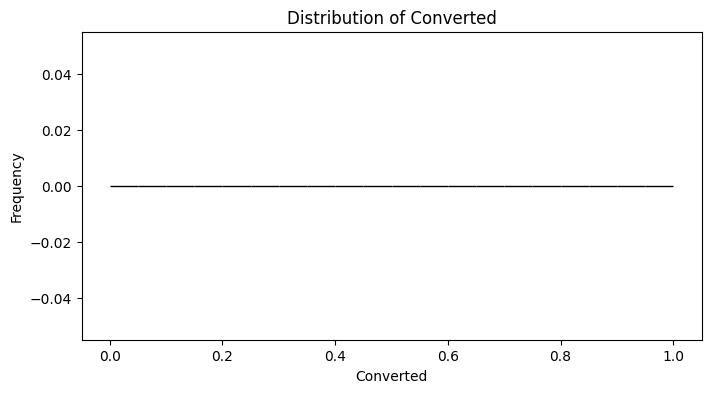

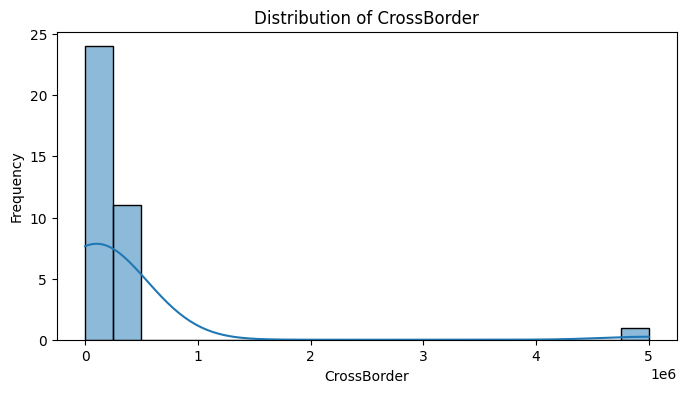

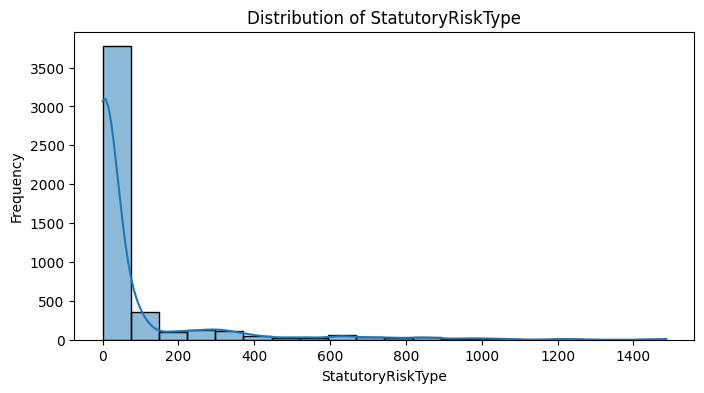

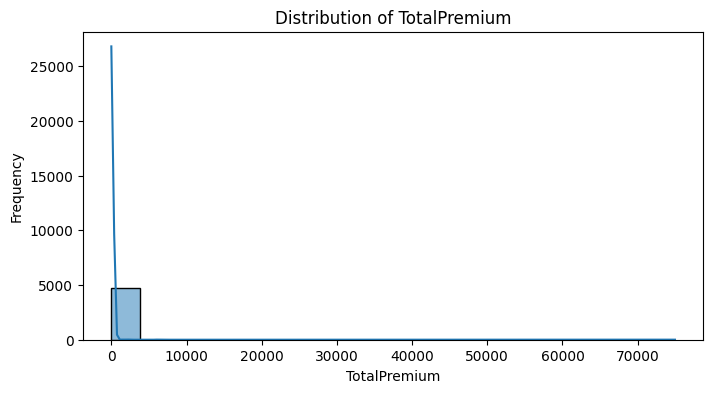

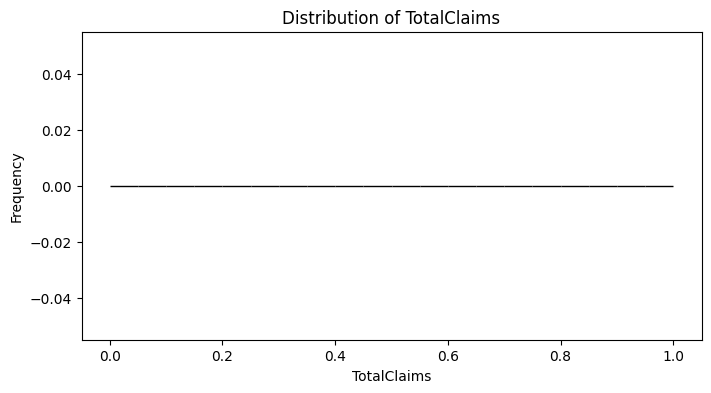

KeyboardInterrupt: 

In [ ]:
# Plot histograms for numerical columns and bar charts for categorical columns.
plot_distributions(df)

Filtered DataFrame shape: (0, 52)


c:\Users\user\Documents\Python\week-03\notebooks\../src\analysis.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=zip_col)


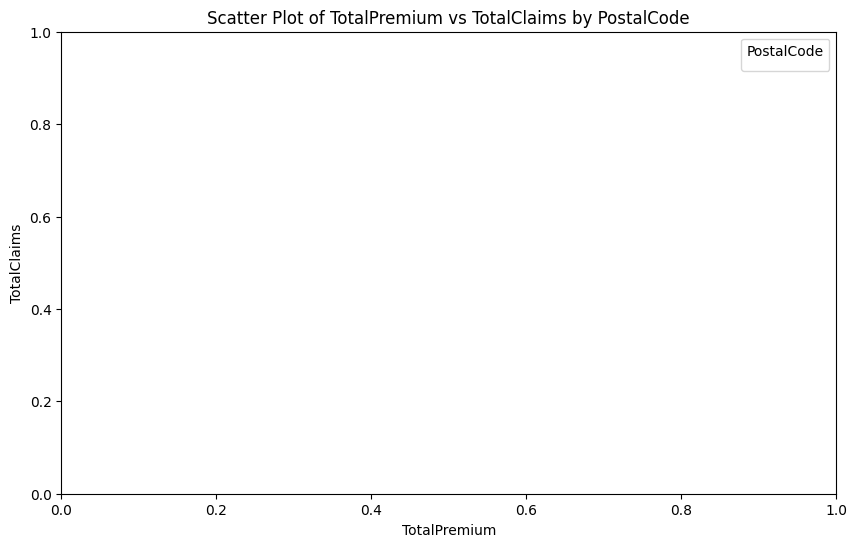

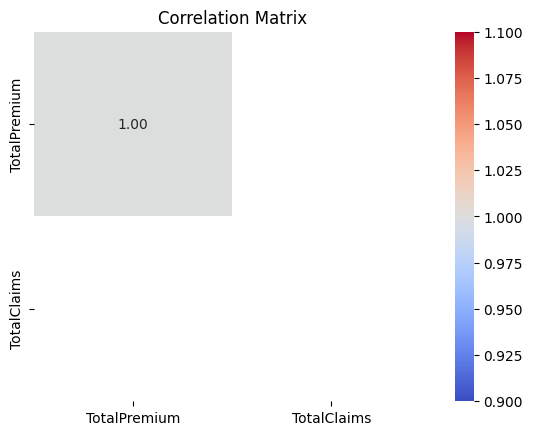

In [3]:
# scatter plots and correlation matrices
plot_correlations(df, 'TotalPremium', 'TotalClaims', 'PostalCode')

c:\Users\user\Documents\Python\week-03\notebooks\../src\analysis.py:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=group_col, y=value_col, estimator='mean', ci=None)


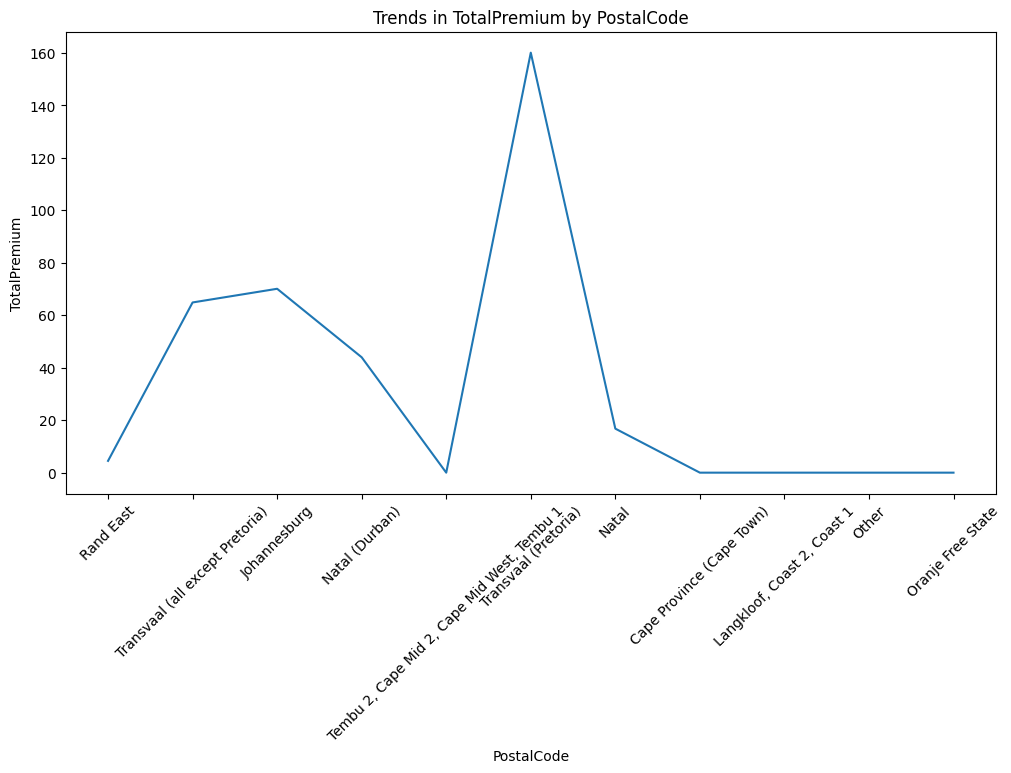

In [4]:
compare_trends(df, 'PostalCode', 'TotalPremium')

ValueError: List of boxplot statistics and `positions` values must have same the length

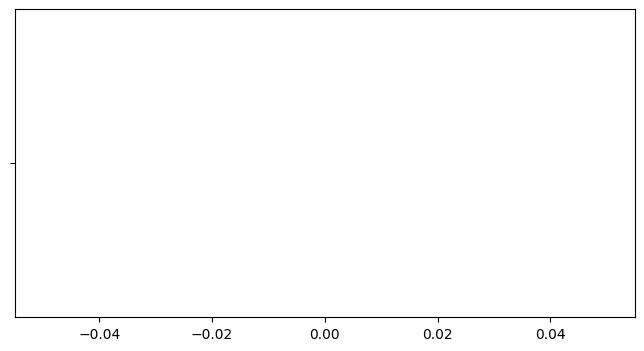

In [4]:
detect_outliers(df, 'TotalClaims')

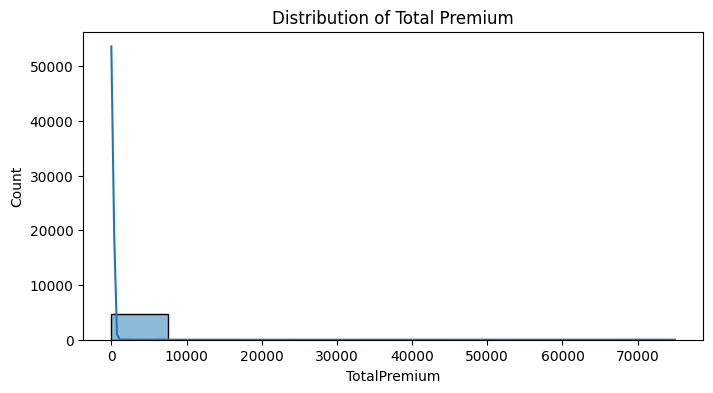

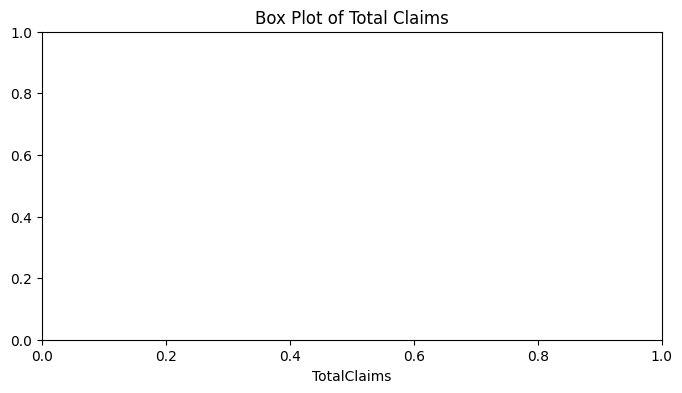

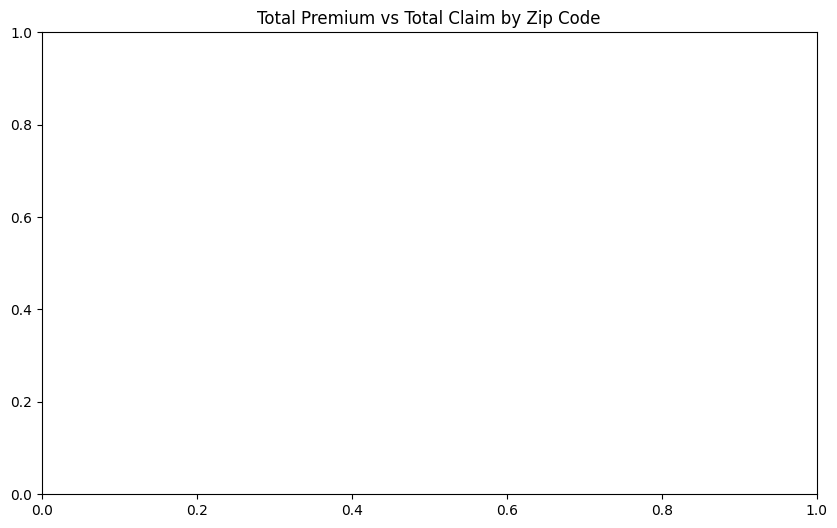

In [3]:
produce_visualizations(df)